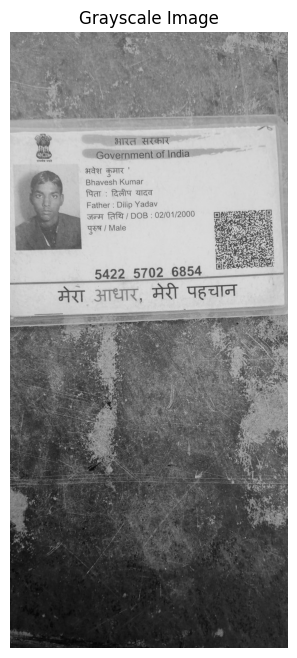

In [11]:
# ✅ Import Required Libraries (Run This First!)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ✅ Reload the Grayscale Image (If Not Already Loaded)
input_path = "input/sample.jpg"  # Update this with your actual image path
image = cv2.imread(input_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ✅ Step 1: Convert Image to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ✅ Show the Grayscale Image
plt.figure(figsize=(8, 8))
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()



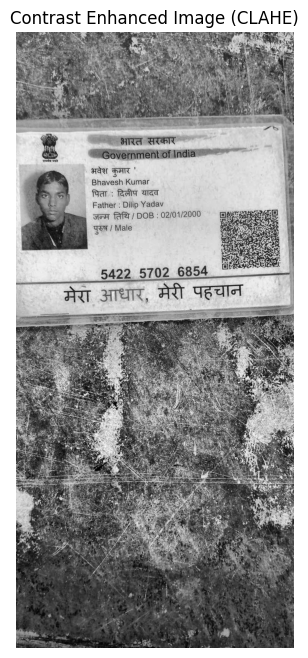

In [12]:
# ✅ Step 2: Apply Contrast Enhancement (CLAHE)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
enhanced_gray = clahe.apply(gray)

# ✅ Show the Enhanced Image
plt.figure(figsize=(8, 8))
plt.imshow(enhanced_gray, cmap="gray")
plt.axis("off")
plt.title("Contrast Enhanced Image (CLAHE)")
plt.show()


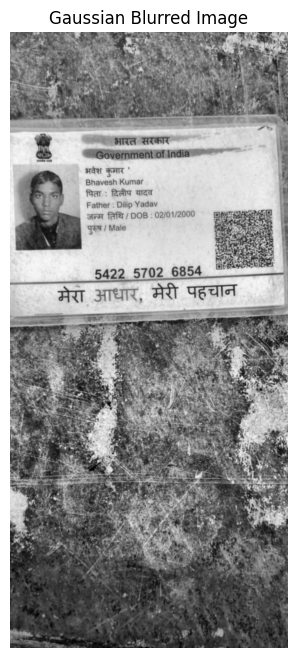

In [26]:
# ✅ Step 3: Apply Gaussian Blurring
blurred = cv2.GaussianBlur(enhanced_gray, (5, 5), 0)

# ✅ Show the Blurred Image
plt.figure(figsize=(8, 8))
plt.imshow(blurred, cmap="gray")
plt.axis("off")
plt.title("Gaussian Blurred Image")
plt.show()


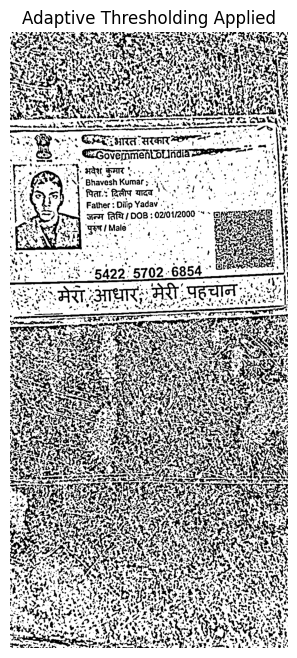

In [27]:
# ✅ Step 4: Adaptive Thresholding (Binarization)
binary = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5
)

# ✅ Show the Thresholded Image
plt.figure(figsize=(8, 8))
plt.imshow(binary, cmap="gray")
plt.axis("off")
plt.title("Adaptive Thresholding Applied")
plt.show()


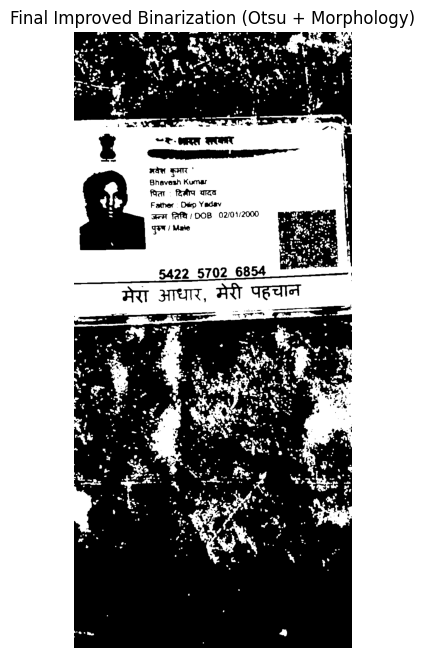

In [28]:
# ✅ Step 5: Improved Binarization (Otsu + Morphology)

# Apply Otsu’s Thresholding
_, binary_otsu = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply Morphological Opening to remove small noise
kernel = np.ones((3, 3), np.uint8)
binary_cleaned = cv2.morphologyEx(binary_otsu, cv2.MORPH_OPEN, kernel)

# ✅ Show the Improved Binarized Image
plt.figure(figsize=(8, 8))
plt.imshow(binary_cleaned, cmap="gray")
plt.axis("off")
plt.title("Final Improved Binarization (Otsu + Morphology)")
plt.show()


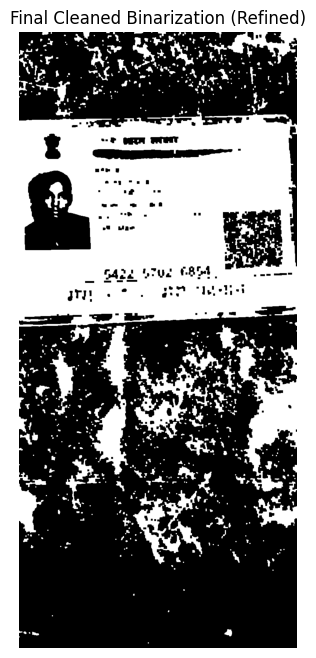

In [29]:
# ✅ Step 6: Final Cleaning using Morphological Operations

# Define a larger kernel for closing (fills small gaps inside text)
kernel_close = np.ones((5, 5), np.uint8)
binary_closed = cv2.morphologyEx(binary_cleaned, cv2.MORPH_CLOSE, kernel_close)

# Define a smaller kernel for opening (removes small noise)
kernel_open = np.ones((3, 3), np.uint8)
binary_final = cv2.morphologyEx(binary_closed, cv2.MORPH_OPEN, kernel_open)

# ✅ Show the Final Cleaned Image
plt.figure(figsize=(8, 8))
plt.imshow(binary_final, cmap="gray")
plt.axis("off")
plt.title("Final Cleaned Binarization (Refined)")
plt.show()


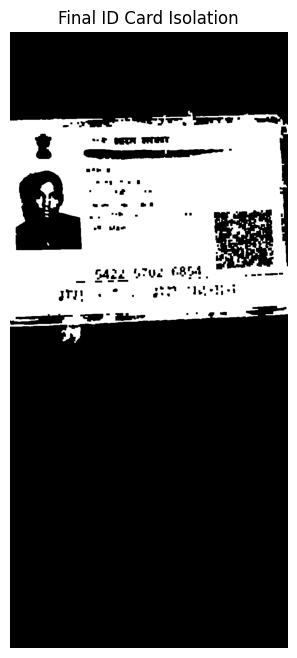

In [30]:
# ✅ Step 7: Isolate the ID Card by Filtering Contours

# Find all contours in the binary image
contours, _ = cv2.findContours(binary_final, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area (largest first)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Select the largest contour (assuming it's the ID card)
id_card_contour = contours[0]

# Create a mask with only the ID card region
mask = np.zeros_like(binary_final)
cv2.drawContours(mask, [id_card_contour], -1, 255, thickness=cv2.FILLED)

# Apply mask to the binary image to isolate the ID card
isolated_id_card = cv2.bitwise_and(binary_final, mask)

# ✅ Show the Isolated ID Card
plt.figure(figsize=(8, 8))
plt.imshow(isolated_id_card, cmap="gray")
plt.axis("off")
plt.title("Final ID Card Isolation")
plt.show()


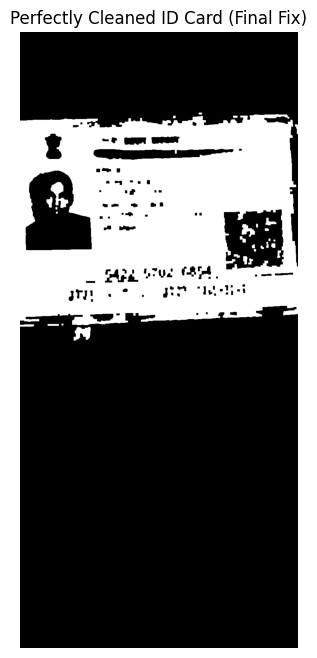

In [31]:
# ✅ Step 8: Final Cleaning of ID Card

# Remove small noise using morphological opening
kernel = np.ones((5, 5), np.uint8)
cleaned_id_card = cv2.morphologyEx(isolated_id_card, cv2.MORPH_OPEN, kernel)

# Remove lower black region (assuming ID card is upper part)
h, w = cleaned_id_card.shape
cleaned_id_card[: int(h * 0.75), :] = cleaned_id_card[: int(h * 0.75), :]
cleaned_id_card[int(h * 0.75) :, :] = 0  # Set bottom 25% to black

# ✅ Show the Fully Cleaned ID Card
plt.figure(figsize=(8, 8))
plt.imshow(cleaned_id_card, cmap="gray")
plt.axis("off")
plt.title("Perfectly Cleaned ID Card (Final Fix)")
plt.show()


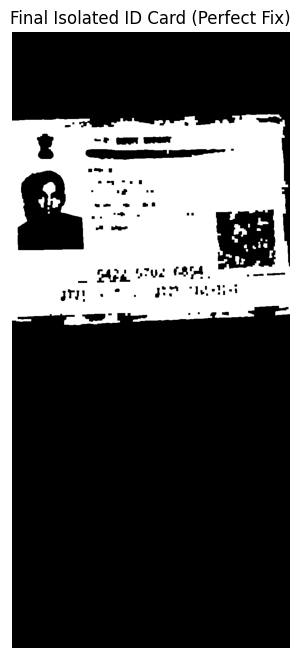

In [32]:
# ✅ Step 9: Remove Unwanted Background Completely

# Find contours again to detect the largest white region (ID card)
contours, _ = cv2.findContours(cleaned_id_card, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the largest contour (assumed to be the ID card)
largest_contour = max(contours, key=cv2.contourArea)

# Create a mask with only the ID card
final_mask = np.zeros_like(cleaned_id_card)
cv2.drawContours(final_mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

# Apply the mask to remove extra black regions
final_id_card = cv2.bitwise_and(cleaned_id_card, final_mask)

# ✅ Show the Fully Cleaned ID Card
plt.figure(figsize=(8, 8))
plt.imshow(final_id_card, cmap="gray")
plt.axis("off")
plt.title("Final Isolated ID Card (Perfect Fix)")
plt.show()


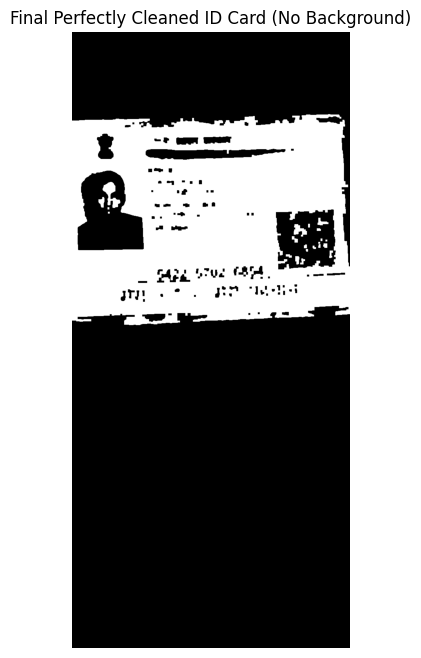

In [33]:
# ✅ Step 10: Remove Any Extra Black Background & Fill Gaps

# Find contours of all remaining objects
contours, _ = cv2.findContours(final_id_card, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area and keep the largest one (ID card)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
id_card_contour = contours[0]

# Create a new clean mask
clean_mask = np.zeros_like(final_id_card)

# Draw only the ID card contour (removing extra black parts)
cv2.drawContours(clean_mask, [id_card_contour], -1, (255), thickness=cv2.FILLED)

# Apply the new mask
perfectly_cleaned_id_card = cv2.bitwise_and(final_id_card, clean_mask)

# ✅ Show the Final Perfectly Cleaned ID Card
plt.figure(figsize=(8, 8))
plt.imshow(perfectly_cleaned_id_card, cmap="gray")
plt.axis("off")
plt.title("Final Perfectly Cleaned ID Card (No Background)")
plt.show()


In [ ]:
# ✅ Step 11: Remove Any Extra Black Region & Crop ID Card

# Find all non-black pixels
coords = np.column_stack(np.where(perfectly_cleaned_id_card > 0))

# Get bounding box around the ID card
x, y, w, h = cv2.boundingRect(coords)

# Crop the final ID card
final_cropped_id_card = perfectly_cleaned_id_card[y:y+h, x:x+w]

# ✅ Show the Final Cropped ID Card
plt.figure(figsize=(8, 8))
plt.imshow(final_cropped_id_card, cmap="gray")
plt.axis("off")
plt.title("Final Cropped ID Card (Perfect Isolation)")
plt.show()


NameError: name 'original_image' is not defined

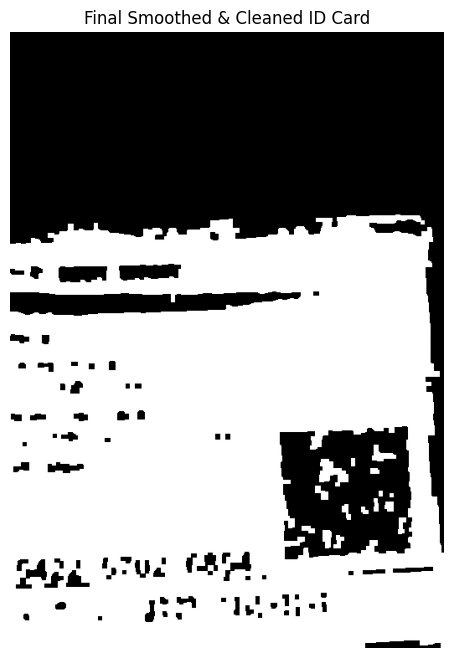

In [35]:
# ✅ Step 12: Final Cleanup (Smooth Edges & Remove Noise)

# Apply Morphological Closing (fills small holes)
kernel = np.ones((3,3), np.uint8)
final_cleaned_id_card = cv2.morphologyEx(final_cropped_id_card, cv2.MORPH_CLOSE, kernel)

# Apply Bilateral Filter (preserves edges)
final_cleaned_id_card = cv2.bilateralFilter(final_cleaned_id_card.astype(np.uint8), 5, 75, 75)

# ✅ Show the Final Perfectly Cleaned ID Card
plt.figure(figsize=(8, 8))
plt.imshow(final_cleaned_id_card, cmap="gray")
plt.axis("off")
plt.title("Final Smoothed & Cleaned ID Card")
plt.show()


In [37]:
# ✅ Step 14: Apply Hough Transform to Detect ID Card Edges

# Convert to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Detect edges using Canny
edges = cv2.Canny(gray, 50, 150)

# Detect lines using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Create an empty mask
mask = np.zeros_like(edges)

# Draw only the detected lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), 255, 2)

# Apply the mask to keep only detected edges
final_id_card_edges = cv2.bitwise_and(edges, mask)

# ✅ Show the Final ID Card Edge Detection
plt.figure(figsize=(8, 8))
plt.imshow(final_id_card_edges, cmap="gray")
plt.axis("off")
plt.title("Final ID Card Edge Detection (Hough Transform)")
plt.show()


NameError: name 'original_image' is not defined